In [23]:
import pygrib
import pandas as pd
# visualization
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from mpl_toolkits.basemap import Basemap
import pygrib

In [24]:
# original path of MRMS
folder_path = 'your_path_to_MRMS_data/'
file_name = 'MRMS_EchoTop_18_00.50_20210101-130037.grib2'

file_path = f"{folder_path}{file_name}"

In [25]:
# Open the original GRIB2 file
grbs = pygrib.open(file_path)
grb = grbs[1]

In [26]:
# Get detailed information about all messages
messages_info = grbs.messages

# Print detailed information for each message to view parameters related to tornadoes
for message_index in range(1, messages_info + 1):
    grb = grbs[message_index]
    print(f"Message {message_index}: {grb}")
    keys = grb.keys()

    # Print parameter names and corresponding values if needed
    # for key in keys:
    #     value = getattr(grb, key, None)
        # print(f"{key}: {value}")

Message 1: 1:44:44 (instant):regular_ll:heightAboveSea:level 500 m:fcst time 0 mins:from 202101011300


ECCODES ERROR   :  Truncating time: non-zero seconds(37) ignored
ECCODES ERROR   :  Truncating time: non-zero seconds(37) ignored


In [27]:
lats, lons = grb.latlons()
var = grb.values

#---Convert latitude/longitude 1D arrays to 2D.
lon2d, lat2d = np.meshgrid(lons[0, :], lats[:, 0])

print(var.min(),var.max())
print(var)

-3.0 19.0
[[-3. -3. -3. ... -3. -3. -3.]
 [-3. -3. -3. ... -3. -3. -3.]
 [-3. -3. -3. ... -3. -3. -3.]
 ...
 [-3. -3. -3. ... -3. -3. -3.]
 [-3. -3. -3. ... -3. -3. -3.]
 [-3. -3. -3. ... -3. -3. -3.]]


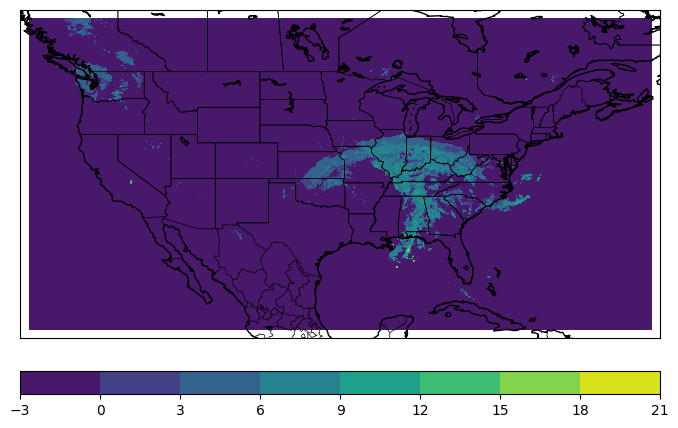

In [28]:
fig = plt.figure(figsize=(8,8))
ax  = fig.add_axes([0.1,0.1,0.8,0.9])

# Define and plot the meridians and parallels
min_lat = np.amin(lats)
max_lat = np.amax(lats)
min_lon = np.amin(lons)
max_lon = np.amax(lons)
    

# Create the basemap object
bm = Basemap(projection="cyl",
             llcrnrlat=min_lat-1,
             urcrnrlat=max_lat+1,
             llcrnrlon=min_lon-1,
             urcrnrlon=max_lon+1,
             resolution='l')

#map = Basemap(projection='cyl',llcrnrlat= -90.,urcrnrlat= 90.,\
#              resolution='c',  llcrnrlon=0.,urcrnrlon=360.)

bm.drawcoastlines()
bm.drawstates()
bm.drawcountries()

cf  = bm.contourf(lon2d,lat2d,var)
cb  = bm.colorbar(cf,"bottom", size="7%", pad="10%")